<a href="https://colab.research.google.com/github/medha-rakesh/DatathonForGood/blob/main/datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set Up

In [1]:
import numpy as np  # For numerical operations and array manipulation
import pandas as pd # For data manipulation and analysis, especially with DataFrames
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations
import seaborn as sns           # For statistical data visualization, built on Matplotlib
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression    # Example: Importing a specific model
from sklearn.metrics import mean_squared_error       # Example: Importing an evaluation metric

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
file_path = '/content/drive/My Drive/DatathonFolder/Health_Risk_Dataset.csv'

Mounted at /content/drive


In [3]:
import io
df = pd.read_csv(file_path)

In [4]:
df.head()

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,A,0,Medium
1,P0738,28,92,2,116,151,38.5,P,1,High
2,P0741,29,91,1,79,135,38.4,A,0,High
3,P0661,24,96,1,95,92,37.3,A,0,Medium
4,P0412,20,96,1,97,97,37.4,A,0,Low


Data Cleaning


In [5]:
y = df["Risk_Level"]
x = df.drop(columns=["Risk_Level", "Patient_ID"])

categorical_features = ["Consciousness"]       # A, V, P, U, C
numeric_features = [col for col in x.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features),
    ]
)

clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", clf),
])

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.95

Classification report:

              precision    recall  f1-score   support

        High       1.00      0.96      0.98        56
         Low       0.94      0.90      0.92        51
      Medium       0.89      0.97      0.93        61
      Normal       1.00      0.97      0.98        32

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv(file_path)

print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nRisk Level distribution:")
print(df['Risk_Level'].value_counts())

DATASET OVERVIEW
Dataset shape: (1000, 10)

First few rows:
  Patient_ID  Respiratory_Rate  Oxygen_Saturation  O2_Scale  Systolic_BP  \
0      P0522                25                 96         1           97   
1      P0738                28                 92         2          116   
2      P0741                29                 91         1           79   
3      P0661                24                 96         1           95   
4      P0412                20                 96         1           97   

   Heart_Rate  Temperature Consciousness  On_Oxygen Risk_Level  
0         107         37.5             A          0     Medium  
1         151         38.5             P          1       High  
2         135         38.4             A          0       High  
3          92         37.3             A          0     Medium  
4          97         37.4             A          0        Low  

Data types:
Patient_ID            object
Respiratory_Rate       int64
Oxygen_Saturation     

In [7]:
# Encode categorical variables
le_consciousness = LabelEncoder()
le_risk = LabelEncoder()

df['Consciousness_Encoded'] = le_consciousness.fit_transform(df['Consciousness'])
df['Risk_Level_Encoded'] = le_risk.fit_transform(df['Risk_Level'])

print("\n" + "="*80)
print("STATISTICS BY RISK LEVEL")
print("="*80)

risk_order = ['Normal', 'Low', 'Medium', 'High']
for risk_level in risk_order:
    if risk_level in df['Risk_Level'].values:
        subset = df[df['Risk_Level'] == risk_level]
        print(f"\n{risk_level} Risk (n={len(subset)}):")
        print(f"  Oxygen Saturation: {subset['Oxygen_Saturation'].mean():.1f}% (±{subset['Oxygen_Saturation'].std():.1f})")
        print(f"  Heart Rate: {subset['Heart_Rate'].mean():.1f} bpm (±{subset['Heart_Rate'].std():.1f})")
        print(f"  Respiratory Rate: {subset['Respiratory_Rate'].mean():.1f} /min (±{subset['Respiratory_Rate'].std():.1f})")
        print(f"  Temperature: {subset['Temperature'].mean():.2f}°C (±{subset['Temperature'].std():.2f})")
        print(f"  Systolic BP: {subset['Systolic_BP'].mean():.1f} mmHg (±{subset['Systolic_BP'].std():.1f})")


STATISTICS BY RISK LEVEL

Normal Risk (n=160):
  Oxygen Saturation: 97.3% (±1.1)
  Heart Rate: 74.5 bpm (±5.3)
  Respiratory Rate: 15.9 /min (±1.7)
  Temperature: 36.79°C (±0.30)
  Systolic BP: 126.6 mmHg (±7.5)

Low Risk (n=255):
  Oxygen Saturation: 95.0% (±1.4)
  Heart Rate: 89.2 bpm (±8.6)
  Respiratory Rate: 18.5 /min (±2.5)
  Temperature: 37.18°C (±0.57)
  Systolic BP: 115.5 mmHg (±9.8)

Medium Risk (n=306):
  Oxygen Saturation: 92.6% (±2.0)
  Heart Rate: 98.3 bpm (±9.1)
  Respiratory Rate: 21.0 /min (±3.0)
  Temperature: 38.09°C (±0.61)
  Systolic BP: 107.1 mmHg (±9.4)

High Risk (n=279):
  Oxygen Saturation: 87.7% (±4.8)
  Heart Rate: 120.9 bpm (±17.4)
  Respiratory Rate: 28.0 /min (±3.8)
  Temperature: 39.06°C (±1.07)
  Systolic BP: 84.8 mmHg (±12.6)


In [8]:
# Correlation analysis
print("\n" + "="*80)
print("CORRELATION WITH RISK LEVEL")
print("="*80)

features = ['Respiratory_Rate', 'Oxygen_Saturation', 'O2_Scale', 'Systolic_BP',
            'Heart_Rate', 'Temperature', 'Consciousness_Encoded', 'On_Oxygen']

correlation_data = []
for feature in features:
    corr = df[feature].corr(df['Risk_Level_Encoded'])
    correlation_data.append({'Feature': feature, 'Correlation': abs(corr)})

corr_df = pd.DataFrame(correlation_data).sort_values('Correlation', ascending=False)
print(corr_df.to_string(index=False))


CORRELATION WITH RISK LEVEL
              Feature  Correlation
          Systolic_BP     0.680155
           Heart_Rate     0.676924
     Respiratory_Rate     0.676821
    Oxygen_Saturation     0.612345
          Temperature     0.536272
            On_Oxygen     0.450297
Consciousness_Encoded     0.320634
             O2_Scale     0.135767


In [9]:
# Prepare data for modeling
X_full = df[['Respiratory_Rate', 'Oxygen_Saturation', 'O2_Scale', 'Systolic_BP',
             'Heart_Rate', 'Temperature', 'Consciousness_Encoded', 'On_Oxygen']]
X_home = df[['Respiratory_Rate', 'Oxygen_Saturation', 'Heart_Rate', 'Temperature']]
y = df['Risk_Level_Encoded']

# Split data
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

X_train_home, X_test_home = train_test_split(
    X_home, test_size=0.2, random_state=42, stratify=y
)[0:2]

print("\n" + "="*80)
print("TRAINING MODELS")
print("="*80)
print(f"Training set size: {len(X_train_full)}")
print(f"Test set size: {len(X_test_full)}")


TRAINING MODELS
Training set size: 800
Test set size: 200


In [10]:
# Train FULL model (all features)
print("\n" + "="*80)
print("MODEL 1: FULL FEATURE SET (Clinical Setting)")
print("="*80)

rf_full = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_full.fit(X_train_full, y_train)

# Predictions
y_pred_full = rf_full.predict(X_test_full)
accuracy_full = accuracy_score(y_test, y_pred_full)

print(f"Accuracy: {accuracy_full:.3f}")

# Feature importance
feature_importance_full = pd.DataFrame({
    'Feature': X_full.columns,
    'Importance': rf_full.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_full.to_string(index=False))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_full, target_names=le_risk.classes_))

# Cross-validation
cv_scores_full = cross_val_score(rf_full, X_full, y, cv=5)
print(f"\nCross-Validation Accuracy: {cv_scores_full.mean():.3f} ± {cv_scores_full.std():.3f}")


MODEL 1: FULL FEATURE SET (Clinical Setting)
Accuracy: 0.950

Feature Importance:
              Feature  Importance
    Oxygen_Saturation    0.236650
           Heart_Rate    0.198905
     Respiratory_Rate    0.173647
          Systolic_BP    0.173018
          Temperature    0.168509
            On_Oxygen    0.030338
Consciousness_Encoded    0.009476
             O2_Scale    0.009456

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.96      0.98        56
         Low       0.94      0.90      0.92        51
      Medium       0.89      0.97      0.93        61
      Normal       1.00      0.97      0.98        32

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200


Cross-Validation Accuracy: 0.966 ± 0.008


In [11]:
# Train HOME-TESTABLE model (4 vital signs only)
print("\n" + "="*80)
print("MODEL 2: HOME-TESTABLE FEATURES ONLY")
print("="*80)
print("Features: Oxygen Saturation, Heart Rate, Respiratory Rate, Temperature")
print("Equipment needed: Pulse oximeter ($25) + Thermometer ($15)")

rf_home = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_home.fit(X_train_home, y_train)

# Predictions
y_pred_home = rf_home.predict(X_test_home)
accuracy_home = accuracy_score(y_test, y_pred_home)

print(f"\nAccuracy: {accuracy_home:.3f}")
print(f"Performance difference from full model: {(accuracy_full - accuracy_home):.3f} ({((accuracy_full - accuracy_home)/accuracy_full)*100:.1f}% decrease)")

# Feature importance
feature_importance_home = pd.DataFrame({
    'Feature': X_home.columns,
    'Importance': rf_home.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_home.to_string(index=False))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_home, target_names=le_risk.classes_))

# Cross-validation
cv_scores_home = cross_val_score(rf_home, X_home, y, cv=5)
print(f"\nCross-Validation Accuracy: {cv_scores_home.mean():.3f} ± {cv_scores_home.std():.3f}")


MODEL 2: HOME-TESTABLE FEATURES ONLY
Features: Oxygen Saturation, Heart Rate, Respiratory Rate, Temperature
Equipment needed: Pulse oximeter ($25) + Thermometer ($15)

Accuracy: 0.925
Performance difference from full model: 0.025 (2.6% decrease)

Feature Importance:
          Feature  Importance
       Heart_Rate    0.276717
Oxygen_Saturation    0.265310
 Respiratory_Rate    0.240352
      Temperature    0.217621

Classification Report:
              precision    recall  f1-score   support

        High       0.98      0.98      0.98        56
         Low       0.91      0.82      0.87        51
      Medium       0.89      0.93      0.91        61
      Normal       0.91      0.97      0.94        32

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200


Cross-Validation Accuracy: 0.905 ± 0.008


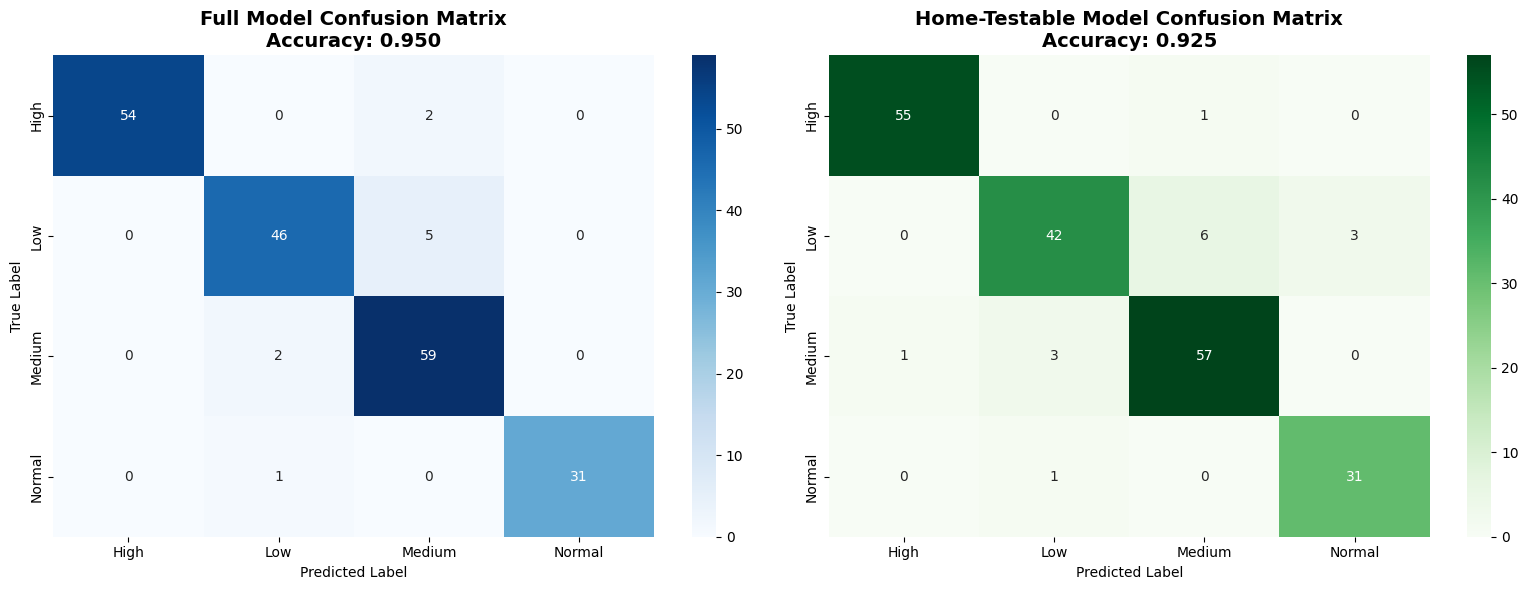

In [12]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Full model confusion matrix
cm_full = confusion_matrix(y_test, y_pred_full)
sns.heatmap(cm_full, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_risk.classes_, yticklabels=le_risk.classes_, ax=axes[0])
axes[0].set_title(f'Full Model Confusion Matrix\nAccuracy: {accuracy_full:.3f}', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Home model confusion matrix
cm_home = confusion_matrix(y_test, y_pred_home)
sns.heatmap(cm_home, annot=True, fmt='d', cmap='Greens',
            xticklabels=le_risk.classes_, yticklabels=le_risk.classes_, ax=axes[1])
axes[1].set_title(f'Home-Testable Model Confusion Matrix\nAccuracy: {accuracy_home:.3f}', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

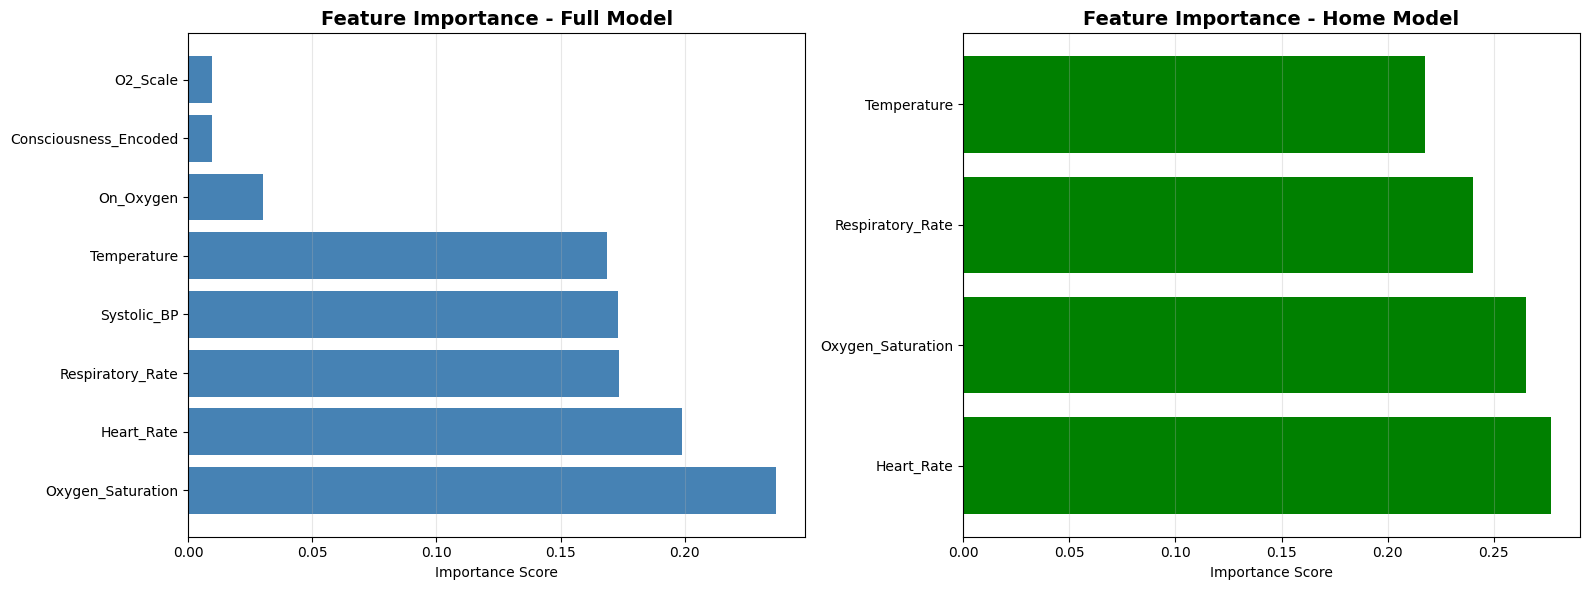

In [13]:
# Feature Importance Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Full model feature importance
axes[0].barh(feature_importance_full['Feature'], feature_importance_full['Importance'], color='steelblue')
axes[0].set_xlabel('Importance Score')
axes[0].set_title('Feature Importance - Full Model', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Home model feature importance
axes[1].barh(feature_importance_home['Feature'], feature_importance_home['Importance'], color='green')
axes[1].set_xlabel('Importance Score')
axes[1].set_title('Feature Importance - Home Model', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

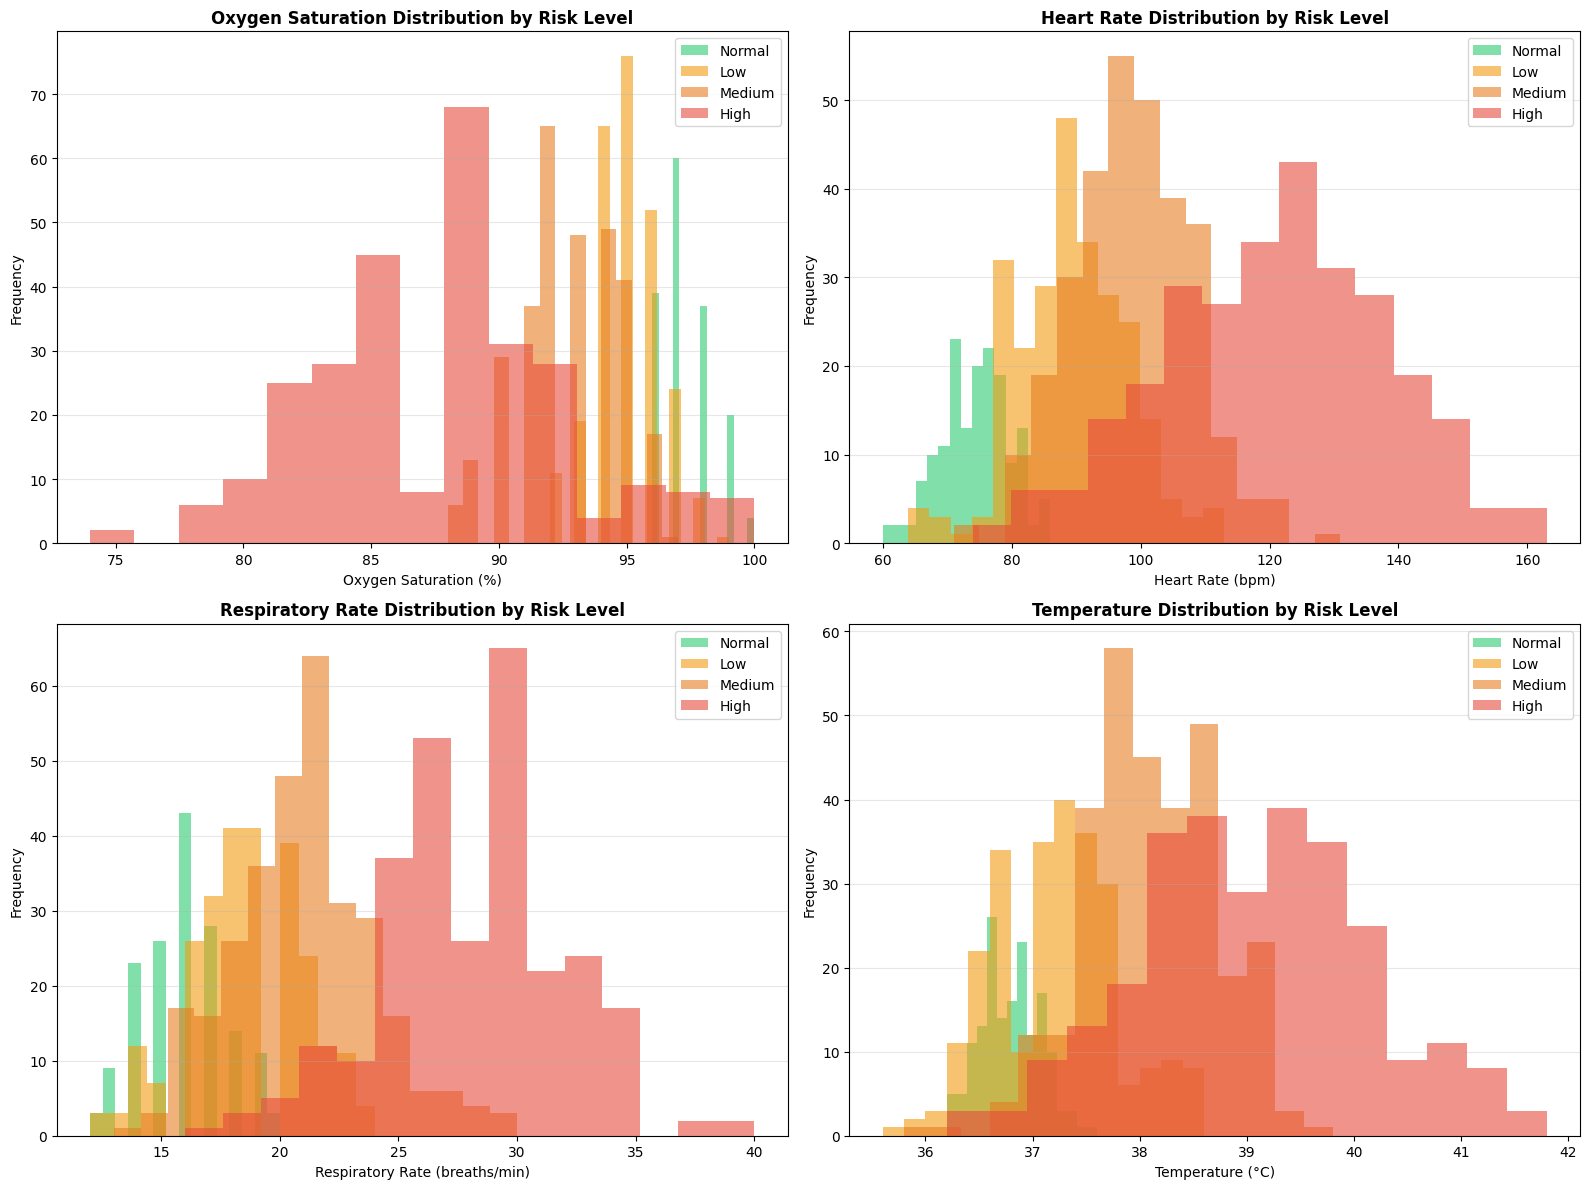

In [14]:
# Visualize vitals by risk level
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
risk_colors = {'Normal': '#2ecc71', 'Low': '#f39c12', 'Medium': '#e67e22', 'High': '#e74c3c'}

# Oxygen Saturation
for risk in risk_order:
    if risk in df['Risk_Level'].values:
        data = df[df['Risk_Level'] == risk]['Oxygen_Saturation']
        axes[0, 0].hist(data, bins=15, alpha=0.6, label=risk, color=risk_colors.get(risk, 'gray'))
axes[0, 0].set_xlabel('Oxygen Saturation (%)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Oxygen Saturation Distribution by Risk Level', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Heart Rate
for risk in risk_order:
    if risk in df['Risk_Level'].values:
        data = df[df['Risk_Level'] == risk]['Heart_Rate']
        axes[0, 1].hist(data, bins=15, alpha=0.6, label=risk, color=risk_colors.get(risk, 'gray'))
axes[0, 1].set_xlabel('Heart Rate (bpm)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Heart Rate Distribution by Risk Level', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Respiratory Rate
for risk in risk_order:
    if risk in df['Risk_Level'].values:
        data = df[df['Risk_Level'] == risk]['Respiratory_Rate']
        axes[1, 0].hist(data, bins=15, alpha=0.6, label=risk, color=risk_colors.get(risk, 'gray'))
axes[1, 0].set_xlabel('Respiratory Rate (breaths/min)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Respiratory Rate Distribution by Risk Level', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Temperature
for risk in risk_order:
    if risk in df['Risk_Level'].values:
        data = df[df['Risk_Level'] == risk]['Temperature']
        axes[1, 1].hist(data, bins=15, alpha=0.6, label=risk, color=risk_colors.get(risk, 'gray'))
axes[1, 1].set_xlabel('Temperature (°C)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Temperature Distribution by Risk Level', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
# Save models
joblib.dump(rf_full, 'respiratory_risk_model_full.pkl')
joblib.dump(rf_home, 'respiratory_risk_model_home.pkl')
joblib.dump(le_risk, 'risk_level_encoder.pkl')

print("\n" + "="*80)
print("MODELS SAVED")
print("="*80)
print("✓ respiratory_risk_model_full.pkl - Full feature model")
print("✓ respiratory_risk_model_home.pkl - Home-testable model")
print("✓ risk_level_encoder.pkl - Risk level encoder")


MODELS SAVED
✓ respiratory_risk_model_full.pkl - Full feature model
✓ respiratory_risk_model_home.pkl - Home-testable model
✓ risk_level_encoder.pkl - Risk level encoder


In [16]:
# Example prediction function
def predict_risk_home(oxygen_sat, heart_rate, resp_rate, temperature):
    """
    Predict respiratory illness risk using home-testable vitals

    Parameters:
    - oxygen_sat: Oxygen saturation (%)
    - heart_rate: Heart rate (bpm)
    - resp_rate: Respiratory rate (breaths/min)
    - temperature: Body temperature (°C)

    Returns:
    - risk_level: Normal, Low, Medium, or High
    - confidence: Probability (0-1)
    - recommendation: What to do
    """
    # Load model
    model = joblib.load('respiratory_risk_model_home.pkl')
    encoder = joblib.load('risk_level_encoder.pkl')

    # Prepare input
    input_data = np.array([[resp_rate, oxygen_sat, heart_rate, temperature]])

    # Predict
    prediction = model.predict(input_data)[0]
    probabilities = model.predict_proba(input_data)[0]
    confidence = probabilities.max()

    # Decode risk level
    risk_level = encoder.inverse_transform([prediction])[0]

    # Generate recommendation
    recommendations = {
        'Normal': '✓ Your vitals are normal. Continue monitoring and rest.',
        'Low': '⚠ Mild concern. Monitor closely and contact doctor if symptoms worsen.',
        'Medium': '⚠️ Moderate risk. Call your doctor TODAY. Check vitals every 4 hours.',
        'High': '🚨 HIGH RISK - Seek emergency care NOW. Call 911 or go to ER immediately.'
    }

    return {
        'risk_level': risk_level,
        'confidence': confidence,
        'recommendation': recommendations.get(risk_level, 'Unknown')
    }

print("\n" + "="*80)
print("EXAMPLE PREDICTIONS")
print("="*80)

# Test cases
test_cases = [
    {'name': 'Normal Patient', 'o2': 97, 'hr': 75, 'rr': 16, 'temp': 36.8},
    {'name': 'Low Risk Patient', 'o2': 94, 'hr': 88, 'rr': 19, 'temp': 37.3},
    {'name': 'Medium Risk Patient', 'o2': 91, 'hr': 102, 'rr': 23, 'temp': 38.5},
    {'name': 'High Risk Patient', 'o2': 87, 'hr': 125, 'rr': 29, 'temp': 39.2}
]

for case in test_cases:
    result = predict_risk_home(case['o2'], case['hr'], case['rr'], case['temp'])
    print(f"\n{case['name']}:")
    print(f"  Vitals: O2={case['o2']}%, HR={case['hr']}bpm, RR={case['rr']}/min, Temp={case['temp']}°C")
    print(f"  Prediction: {result['risk_level']} (confidence: {result['confidence']:.1%})")
    print(f"  {result['recommendation']}")


EXAMPLE PREDICTIONS

Normal Patient:
  Vitals: O2=97%, HR=75bpm, RR=16/min, Temp=36.8°C
  Prediction: Normal (confidence: 99.9%)
  ✓ Your vitals are normal. Continue monitoring and rest.

Low Risk Patient:
  Vitals: O2=94%, HR=88bpm, RR=19/min, Temp=37.3°C
  Prediction: Low (confidence: 98.2%)
  ⚠ Mild concern. Monitor closely and contact doctor if symptoms worsen.

Medium Risk Patient:
  Vitals: O2=91%, HR=102bpm, RR=23/min, Temp=38.5°C
  Prediction: Medium (confidence: 94.5%)
  ⚠️ Moderate risk. Call your doctor TODAY. Check vitals every 4 hours.

High Risk Patient:
  Vitals: O2=87%, HR=125bpm, RR=29/min, Temp=39.2°C
  Prediction: High (confidence: 100.0%)
  🚨 HIGH RISK - Seek emergency care NOW. Call 911 or go to ER immediately.


In [17]:
# Summary statistics
print("\n" + "="*80)
print("KEY FINDINGS SUMMARY")
print("="*80)
print("\n🎯 MOST IMPORTANT VITAL SIGNS (Home Model):")
for idx, row in feature_importance_home.iterrows():
    print(f"  {idx+1}. {row['Feature']}: {row['Importance']:.1%} importance")

print("\n📊 MODEL PERFORMANCE:")
print(f"  Home-testable model accuracy: {accuracy_home:.1%}")
print(f"  Equipment needed: $40 (pulse oximeter + thermometer)")
print(f"  Only {((accuracy_full - accuracy_home)/accuracy_full)*100:.1f}% accuracy loss vs clinical model")

print("\n🏥 CLINICAL THRESHOLDS (from data):")
print("  HIGH RISK typically has:")
print(f"    - Oxygen saturation < 90%")
print(f"    - Heart rate > 110 bpm")
print(f"    - Respiratory rate > 25 /min")
print(f"    - Temperature > 38.5°C")

print("\n💡 USE CASES:")
print("  ✓ COVID-19 home monitoring")
print("  ✓ Pneumonia early detection")
print("  ✓ TB patient tracking (Native American communities)")
print("  ✓ Sickle cell acute chest syndrome")
print("  ✓ COPD/Asthma exacerbation monitoring")
print("  ✓ Post-hospital discharge surveillance")


KEY FINDINGS SUMMARY

🎯 MOST IMPORTANT VITAL SIGNS (Home Model):
  3. Heart_Rate: 27.7% importance
  2. Oxygen_Saturation: 26.5% importance
  1. Respiratory_Rate: 24.0% importance
  4. Temperature: 21.8% importance

📊 MODEL PERFORMANCE:
  Home-testable model accuracy: 92.5%
  Equipment needed: $40 (pulse oximeter + thermometer)
  Only 2.6% accuracy loss vs clinical model

🏥 CLINICAL THRESHOLDS (from data):
  HIGH RISK typically has:
    - Oxygen saturation < 90%
    - Heart rate > 110 bpm
    - Respiratory rate > 25 /min
    - Temperature > 38.5°C

💡 USE CASES:
  ✓ COVID-19 home monitoring
  ✓ Pneumonia early detection
  ✓ TB patient tracking (Native American communities)
  ✓ Sickle cell acute chest syndrome
  ✓ COPD/Asthma exacerbation monitoring
  ✓ Post-hospital discharge surveillance


In [18]:
predict_risk_home(0.97, 72, 15, 98.4)

{'risk_level': 'High',
 'confidence': np.float64(0.72),
 'recommendation': '🚨 HIGH RISK - Seek emergency care NOW. Call 911 or go to ER immediately.'}